# phylogeny of global M. bovis lineages

Make phylogeny from selected samples and delineate lineages

* global https://www.frontiersin.org/articles/10.3389/fmicb.2020.00843/full
* UK https://www.ncbi.nlm.nih.gov/bioproject/PRJNA523164

In [5]:
import sys,os,shutil,subprocess
import glob,random
from importlib import reload
import numpy as np
import pandas as pd
pd.set_option('display.width', 200)
import pylab as plt
import matplotlib as mpl
import seaborn as sns
from Bio import SeqIO
sys.path.append('pathogenie')
from snipgenie import tools, aligners, app, trees, plotting
import toytree

In [ ]:
reload(app)
#samples = pd.read_csv('/storage/btbgenie/global_results/samples.csv')
#app.clean_bam_files(samples,'/storage/btbgenie/global_results/mapped/',True)

In [ ]:
reload(app)
reload(tools)
reload(aligners)
args = {'threads':16, 'outdir': '/storage/btbgenie/global_results', 'labelsep':'-',
        'input':['/storage/btbgenie/brites'],
         'species': 'Mbovis-AF212297', 'overwrite':False,
         'custom_filters': True,
         'buildtree':True}
W = app.WorkFlow(**args)
st = W.setup()
W.run()

In [30]:
treefile1 = '/storage/btbgenie/global_results/tree.newick'
tre = toytree.tree(treefile1)
mystyle = { "layout": 'c','node_sizes':1,'tip_labels_align':True}
tre.draw(**mystyle,height=700);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="700.0px" height="700.0px" viewBox="0 0 700.0 700.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tc57fae40340b406c8b7c90724619f9ee"> SRR8063659 SRR8063661 SRR8063666 SRR8063665 SRR8063653 SRR8063664 SRR8063654 SRR8063663 ERR4772235 ERR3458084 ERR4772231 ERR4772214 ERR4769560 ERR4772208 ERR4769559 SRR8063658 SRR8063657 ERR4772217 ERR4772216 ERR4772215 ERR4772213 ERR4772224 ERR4772228 ERR4772222 SRR8063656 SRR8063662 SRR8063655 SRR8063652 ERR3077969 SRR8065078 SRR8065082 SRR8065079 SRR8065071 SRR8065069 SRR8065085 SRR8065086 SRR8065070 SRR8065087 SRR1173570 SRR8065080 SRR8065073 SRR8065084 SRR8065074 SRR8065081 ERR3458087 ERR3458086 ERR4772237 ERR4772209 ERR4769561 ERR3458085 ERR4772236 SRR8063660 ERR4772234 ERR1200622 SRR8063651 ERR4772221 ERR4772220 ERR4772223 ERR4769565 ERR4772227 ERR3458081 SRR1791710 SRR1791712 ERR3458080 SRR5486073 SRR5486081 SRR5486075 SRR5486076 SRR3085259 SRR7851312 SRR7851345 SRR7851330 SRR4117155 SRR7851375 ERR6358029 ERR6358030 SRR5486077 SRR5486078 SRR5486082 SRR5486079 SRR5486074 SRR5486086 SRR5486085 SRR5486084 SRR7131117 SRR7851368 ERR1462578 ERR1462593 ERR2517345 ERR2510206 ERR2510183 SRR7617662 SRR1792164 SRR1792165 DRR120408 DRR120409 SRR8065083 SRR8065076 SRR8065072 SRR8065075 SRR8065077 ERR4769567 ERR502526 ERR502499 ERR502538 ERR502529 ERR2515016 ERR553061 ERR1203064 ERR1815545 ERR1815542 ERR1815546 ERR1815549 ERR1815541 ERR1815547 ERR1815540 SRR1792027 SRR6467889 SRR7851300 SRR8064854 SRR8064853 SRR8064855 SRR8064860 SRR8064856 SRR8064859 SRR8064858 SRR8064857 SRR7851315 SRR7851336 SRR7851333 SRR5216883 SRR5216806 SRR5216951 SRR5431718 ERR400460 ERR1815539 ERR1815550 ERR1815544 SRR5431790 SRR5430098 SRR5431720 SRR5431730 SRR1657070 SRR1657061 SRR6467887 SRR5431711 SRR5430749 SRR5431795 SRR5430746 ERR046748 ERR046954 ERR046961 ERR046749 SRR2100072 SRR2100074 SRR2101351 ref SRR5216799 SRR5216884 SRR5216779 SRR5216928 SRR5216970 SRR5216893 SRR5216854 SRR5216727 SRR5216763 SRR6467891 SRR5216759 SRR5216774 SRR5216741 ERR1815543 SRR5216740 SRR5216835 ERR841874 ERR841810 ERR400386

## spoligotypes

In [ ]:
def get_spoligotypes(samples, spo=None):
    """Get spoligotypes for multiple M.bovis strains"""
    
    if spo is not None:
        done=list(spo['sample'])
    else:
        done=[]
    samples = samples.drop_duplicates('sample')
    res=[]
    for i,r in samples.iterrows():       
        f=r.filename1
        samp=r['sample']
        if samp in done:
            continue
        b = tools.get_spoligotype(f)
        sb = tools.get_sb_number(b)
        print (r['sample'], sb, b)
        res.append([r['sample'],sb,b])
    
    res = pd.DataFrame(res,columns=['sample','SB','code'])
    return res

#spo = pd.read_csv('/storage/btbgenie/global_results/spotypes.csv')
samples = pd.read_csv('/storage/btbgenie/global_results/samples.csv')
res = get_spoligotypes(samples)#,spo)
#res=pd.concat([spo,res])
res.to_csv('/storage/btbgenie/global_results/spotypes.csv')

## RD analysis

In [ ]:
samples = pd.read_csv('/storage/btbgenie/global_results/samples.csv')
from snipgenie import rdiff
rdiff.create_rd_index()
res = rdiff.run_samples(samples,'/storage/btbgenie/global_results/rd_aligned',threads=20)
X = rdiff.get_matrix(res, cutoff=0.15)
X['ident'] = X.apply(rdiff.apply_rules,1)
X.to_csv('/storage/btbgenie/global_results/rd.csv')

In [ ]:
#sns.heatmap(X)
X.sort_values('ident')

## merge to get metadata 

In [48]:
samples = pd.read_csv('/storage/btbgenie/global_results/samples.csv')
#sra = pd.read_csv('mbovis_sra_filtered.csv')
meta = pd.read_csv('brites_table1.csv')
x = samples.merge(meta,right_on='Accession_Number',left_on='sample',how='left')
spotypes = pd.read_csv('/storage/btbgenie/global_results/spotypes.csv')
meta = x.merge(spotypes,on='sample')
len(meta)

175

In [49]:
treefile1 = '/storage/btbgenie/global_results/tree.newick'
clusts = trees.get_clusters(treefile1)
meta = meta.merge(clusts,left_on='sample',right_on='SequenceName')

TreeCluster.py  -i /storage/btbgenie/global_results/tree.newick -t 3 -m max_clade
TreeCluster.py  -i /storage/btbgenie/global_results/tree.newick -t 5 -m max_clade
TreeCluster.py  -i /storage/btbgenie/global_results/tree.newick -t 7 -m max_clade
TreeCluster.py  -i /storage/btbgenie/global_results/tree.newick -t 10 -m max_clade
TreeCluster.py  -i /storage/btbgenie/global_results/tree.newick -t 12 -m max_clade
TreeCluster.py  -i /storage/btbgenie/global_results/tree.newick -t 20 -m max_clade
TreeCluster.py  -i /storage/btbgenie/global_results/tree.newick -t 50 -m max_clade
TreeCluster.py  -i /storage/btbgenie/global_results/tree.newick -t 100 -m max_clade


In [50]:
meta.to_csv('/storage/btbgenie/global_results/metadata.csv',index=False)

## combine ireland + global samples

add Ireland samples to global tree

In [5]:
outdir='/storage/btbgenie/combined_results'

folders = {'wicklow':'/storage/btbgenie/wicklow_results',
          'other':'/storage/btbgenie/misc_results/',
          'monaghan':'/storage/btbgenie/monaghan/monaghan_results',
          'NI':'/storage/btbgenie/NI_results/',
          'NI_AFBI':'/storage/btbgenie/NI_AFBI_results/',
          'global':'/storage/btbgenie/global_results/'}

x=[]
for f in folders:
    print (f)
    file = os.path.join(folders[f],'samples.csv')   
    df=pd.read_csv(file)
    #if f != 'global':
    #   df = df.sample(20,random_state=1) 
    x.append(df)
allsamples = pd.concat(x)
print (len(allsamples))
allsamples.to_csv(os.path.join(outdir,'samples.csv'),index=False)
app.write_samples(allsamples[['sample']], outdir)

wicklow
other
monaghan
NI
NI_AFBI
global
598


'/storage/btbgenie/combined_results/samples.txt'

## run variant calling on combined files

In [ ]:
reload(app)
bam_files = allsamples.bam_file
outdir='/storage/btbgenie/combined_results'
gff_file=os.path.join(outdir,'mbovis.gff')
tools.gff_bcftools_format(app.mbovis_gb, gff_file)
app.run_bamfiles(bam_files, app.mbovis_genome, outdir='/storage/btbgenie/combined_results', threads=16,
                 mask=app.mbovis_mask, gff_file=gff_file,
                 custom_filters=True, overwrite=False)

<div class="alert alert-block alert-info"><b>Start here for post analysis</b></div>

In [18]:
scols=['sample','SB','batch','county']
master = pd.read_csv('/storage/btbgenie/mbovis_ireland/ireland_metadata.csv')[scols]
master['Country']='Ireland'
meta['Country']=meta.geo_loc_name_country
print (len(master), len(meta))
master=pd.concat([master,meta])

567 233


In [19]:
def get_common(x, common):
    if x in common:
        return x
    else:
        return 'Other'

In [20]:
common = master.Country.value_counts()[:9]
master['Country1'] = master.Country.apply(lambda x: get_common(x, common))
len(master)

800

In [21]:
common = master.county.value_counts()[:4]
master['county1'] = master.county.apply(lambda x: get_common(x, common))
master['cc'] = master.county1.fillna(master.Country1)

In [22]:
common = master.SB.value_counts()[:8]
master['SB1'] = master.SB.apply(lambda x: get_common(x, common))

TreeCluster.py  -i /storage/btbgenie/combined_results/tree.newick -t 3 -m max_clade
TreeCluster.py  -i /storage/btbgenie/combined_results/tree.newick -t 5 -m max_clade
TreeCluster.py  -i /storage/btbgenie/combined_results/tree.newick -t 7 -m max_clade
TreeCluster.py  -i /storage/btbgenie/combined_results/tree.newick -t 10 -m max_clade
TreeCluster.py  -i /storage/btbgenie/combined_results/tree.newick -t 12 -m max_clade
TreeCluster.py  -i /storage/btbgenie/combined_results/tree.newick -t 20 -m max_clade
TreeCluster.py  -i /storage/btbgenie/combined_results/tree.newick -t 50 -m max_clade
TreeCluster.py  -i /storage/btbgenie/combined_results/tree.newick -t 100 -m max_clade
[4, 5, 9, -1, 8, 18, 15, 6, 7, 33, 37, 32, 28, 20, 42, 29, 17, 22, 13]


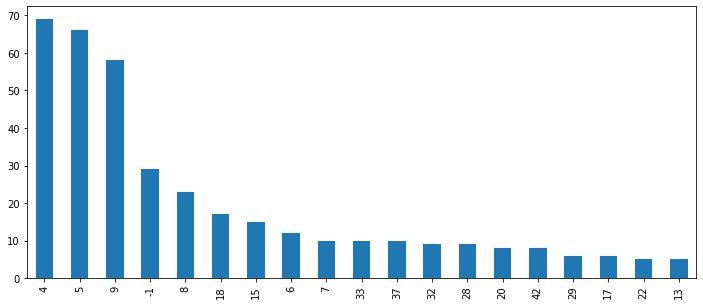

In [4]:
treefile = '/storage/btbgenie/combined_results/tree.newick'
clusts = trees.get_clusters(treefile)
cc = clusts.snp100.value_counts()[1:20]
cc.plot(kind='bar',figsize=(12,5))
print (list(cc.index))

In [26]:
master = master.merge(clusts,left_on='sample',right_on='SequenceName')

In [27]:
master.to_csv('/storage/btbgenie/combined_results/metadata.csv')
len(master)

596

In [ ]:
#tre = tre.root(names=['SRR5486072'])
def toytree_draw(tre, meta, labelcol,colorcol):
    """Draw colored tree with toytree"""
    
    tipnames = tre.get_tip_labels()
    mapping = dict(zip(meta['sample'],meta[labelcol]))
    mapping['ref'] = 'AF2122/97'
    tiplabels = [mapping[i] if i in mapping else 'NA' for i in tipnames]   
    mapping = dict(zip(meta['sample'],meta[colorcol]))
    colormap = trees.colors_from_labels(meta,'sample',colorcol)
    tip_colors = [colormap[mapping[i]] if i in mapping else 'Black' for i in tipnames]
    node_sizes=[0 if i else 8 for i in tre.get_node_values(None, 1, 0)]
    node_colors = [colormap[mapping[n]] if n in mapping else 'black' for n in tre.get_node_values('name', True, True)]

    canvas,t,r=tre.draw(layout='r',width=600,height=800,tip_labels=tiplabels,node_markers="o",node_hover=True,edge_widths=1,
             tip_labels_colors=tip_colors,node_sizes=node_sizes,scalebar=True,node_colors=node_colors)#tip_labels_align=True);
    #canvas.legend(leg,corner=("top", 100, 100, 70));
    return

#import toyplot
#toyplot.png.render(canvas, "/storage/btbgenie/global_results/tree_clusters.png")
toytree_draw(tre2, master,'Country1','SB')

In [79]:
#combine rd data
rd1=pd.read_csv('/storage/btbgenie/global_results/rd.csv',index_col=0)
rd2=pd.read_csv('/storage/btbgenie/mbovis_ireland/rd.csv',index_col=0)
rd=pd.concat([rd1,rd2])

In [80]:
rd

,RD1,RD10,RD105,RD108,RD11,RD110a,RD115,RD12,RD122,RD127,...,RD724,RD726,RD750,RD761,RD8,RD9,RDAf2,RDoryx_wag22,pks15/1,ident
name,,,,,,,,,,,,,,,,,,,,,
ERR5311090,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,L1
ERR4769538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,L1
ERR4769489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,L1
ERR4769457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,L1
ERR4769446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,L1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37-MBovis,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Bovis
365,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Bovis
362p,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Bovis


In [ ]:
master[cols]

In [ ]:
cols=['sample','SB']
rvar = ['RD149','RD3','RD5','RD5oryx*','RD122','RDAf2']
X = rd[rvar]
X=X.merge(master[cols],left_index=True,right_on='sample').set_index(cols)
#X = X.iloc[:,1:]
#print (X)
sns.clustermap(X,xticklabels=True,yticklabels=True,figsize=(12,12))


In [ ]:
names = tre2.get_tip_labels()
names.reverse()
#print (names)
rdv=rd[rvar]
matrix = rdv.loc[names].values*255

In [ ]:
# create a canvas
import toyplot
canvas = toyplot.Canvas(width=600, height=650);

# add tree
axes = canvas.cartesian(bounds=(50, 350, 20, 640))
tre2.draw(axes=axes,tip_labels_colors=tip_colors,#node_colors=node_colors, #,tip_labels=tiplabels #
         tip_labels_align=True)

# add matrix
table = canvas.table(
    rows=len(rdv),
    columns=6,
    margin=0,
    bounds=(375, 450, 25, 630),  
)

colormap = toyplot.color.brewer.map("Blues")

# apply a color to each cell in the table
for ridx in range(matrix.shape[0]):
    for cidx in range(matrix.shape[1]):
        cell = table.cells.cell[ridx, cidx]
        cell.style = {
            "fill": colormap.colors(matrix[ridx, cidx], 0, 100),
        }

# style the gaps between cells
table.body.gaps.columns[:] = 3
table.body.gaps.rows[:] = 3


## SNPs and indels clustering

In [184]:
csq = app.read_csq_file('/storage/btbgenie/combined_results/csq.tsv')
snp_mat = app.get_aa_snp_matrix(csq)

In [187]:
csqind = app.read_csq_file('/storage/btbgenie/combined_results/csq_indels.tsv')
#print (csqind)
#print (csqind.snp_type.value_counts())

ind_mat = app.get_aa_snp_matrix(csqind)
ind_mat.reset_index().snp_type.value_counts()
#ind_mat
#ind_mat[ind_mat.sum(1)>5]

frameshift                   498
inframe_insertion            249
inframe_deletion             184
stop_lost                      4
frameshift&stop_retained       3
start_lost                     3
missense&inframe_altering      1
stop_lost&frameshift           1
Name: snp_type, dtype: int64

In [189]:
mat = snp_mat
#mat.index = mat.index.get_level_values(1)+'_'+mat.index.get_level_values(2)
stat = mat.sum(1).reset_index()
#stat.gene.value_counts()[:30]

In [ ]:
C=mat.T
C=C.merge(meta[cols],left_index=True,right_on='SRA ID').set_index(cols).T
C=C[C.sum(1)>3].T
C.iloc[:4,:2]

In [62]:
countries = C.index.get_level_values(1)
sb = C.index.get_level_values(2)
clust = C.index.get_level_values(3)

In [ ]:
reload(trees)
colormap1 = dict(zip(sb.unique(), trees.qcolors))
colors1 = [colormap1[i] if i in colormap1 else 'Black' for i in sb]

colormap2 = dict(zip(clust.unique(), trees.qcolors))
colors2 = [colormap2[i] if i in colormap2 else 'Black' for i in clust]
#print (colors2)

g=sns.clustermap(C,xticklabels=False,yticklabels=True,figsize=(17,12),cmap='gray_r',cbar_pos=None,row_colors=colors2)
g.fig.savefig('/storage/btbgenie/global_results/indel_clusters.jpg')

## PCA snps

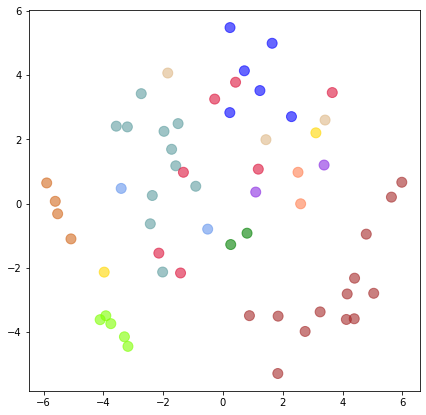

In [59]:
import sklearn
from sklearn import decomposition
from sklearn import manifold

pca = decomposition.PCA(n_components=3)
mds = manifold.MDS(n_components=3)
pos = mds.fit(C).embedding_
X = pca.fit_transform(pos)
#X = pca.transform(C)

fig,ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0], X[:, 1], c=colors2, s=100, alpha=.6)
